In [1]:
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

In [2]:
start = datetime.datetime(2012,1,1)
end = datetime.datetime(2017,1,1)

In [3]:
tesla = web.DataReader("TSLA",'yahoo',start,end)

In [4]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,5.900,5.530,5.788,5.616,4640500,5.616
2012-01-04,5.734,5.500,5.642,5.542,3150500,5.542
2012-01-05,5.586,5.370,5.552,5.424,5027500,5.424
2012-01-06,5.558,5.282,5.440,5.382,4931500,5.382
2012-01-09,5.498,5.224,5.400,5.450,4485000,5.450


In [5]:
ford = web.DataReader("F",'yahoo',start,end)

In [6]:
GM = web.DataReader("GM",'yahoo',start,end)

In [7]:
tesla.to_csv('Tesla_Stock.csv')

In [9]:
ford.to_csv('Ford_Stock.csv')

In [10]:
GM.to_csv('GM_Stock.csv')

In [12]:
ford.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.544740
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.659981
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,7.856563
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,7.937905
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,7.998916


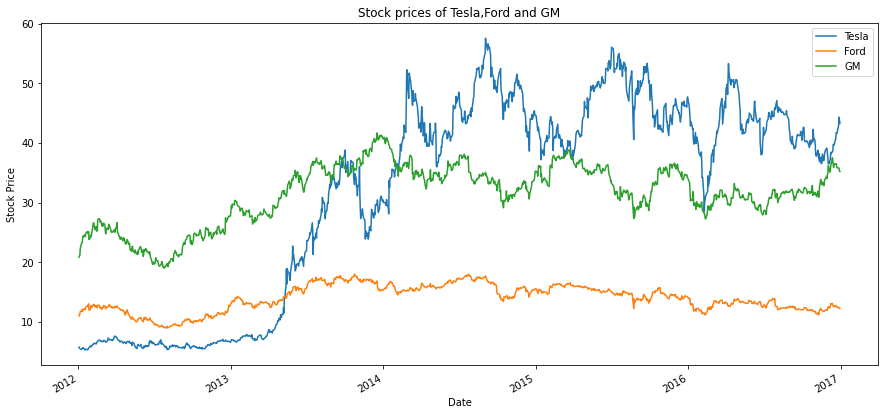

In [21]:
tesla['Open'].plot(ylabel = 'Stock Price', label = 'Tesla',figsize = (15,7))
ford['Open'].plot(label = 'Ford')
GM['Open'].plot(label = 'GM')
plt.title('Stock prices of Tesla,Ford and GM')
plt.legend()

Text(0, 0.5, 'Volume Traded')

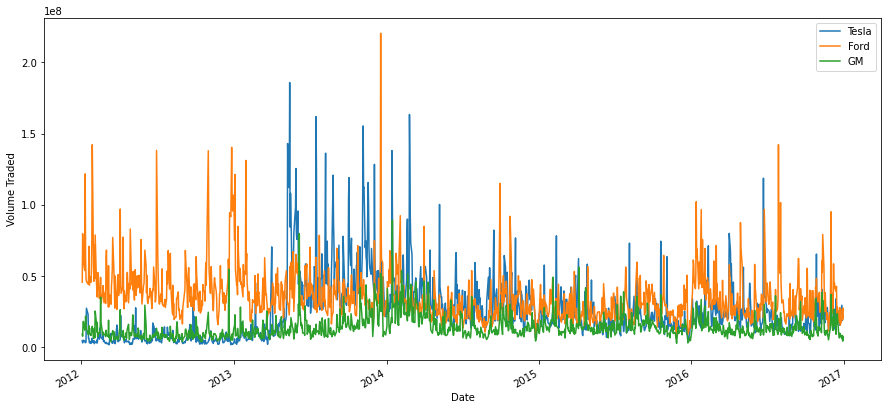

In [25]:
tesla['Volume'].plot(label = 'Tesla', figsize = (15,7))
ford['Volume'].plot(label = 'Ford')
GM['Volume'].plot(label = 'GM')
plt.legend()
plt.ylabel('Volume Traded')

In [26]:
ford.iloc[[ford['Volume'].argmax()]]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-12-18,16.0,15.17,15.99,15.65,220363000.0,11.093974


<AxesSubplot:xlabel='Date'>

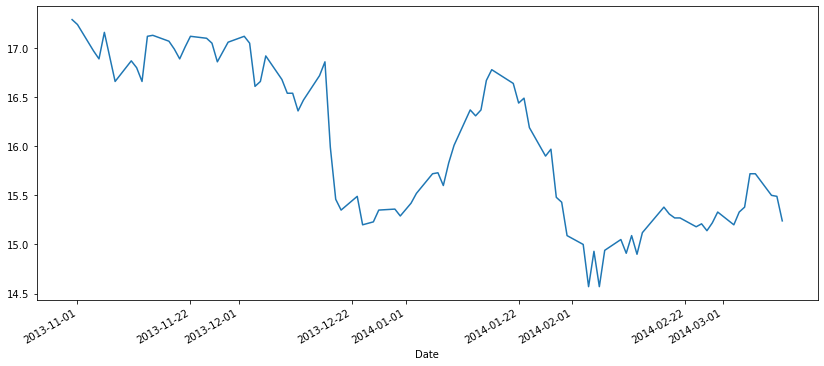

In [29]:
ford.iloc[460:550]['Open'].plot(figsize = (14,6))

In [32]:
tesla['Total traded'] = tesla['Open'] * tesla['Volume']
ford['Total traded'] = ford['Open'] * ford['Volume']
GM['Total traded'] = GM['Open'] * GM['Volume']

In [33]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total traded
Date,,,,,,,
2012-01-03,5.900,5.530,5.788,5.616,4640500,5.616,2.685921e+07
2012-01-04,5.734,5.500,5.642,5.542,3150500,5.542,1.777512e+07
2012-01-05,5.586,5.370,5.552,5.424,5027500,5.424,2.791268e+07
2012-01-06,5.558,5.282,5.440,5.382,4931500,5.382,2.682736e+07
2012-01-09,5.498,5.224,5.400,5.450,4485000,5.450,2.421900e+07


In [34]:
ford.head()

,High,Low,Open,Close,Volume,Adj Close,Total traded
Date,,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.544740,5.028089e+08
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.659981,8.889359e+08
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,7.856563,7.690521e+08
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,7.937905,7.025298e+08
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,7.998916,6.386011e+08


In [35]:
GM.head()

,High,Low,Open,Close,Volume,Adj Close,Total traded
Date,,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.269407,1.941627e+08
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.346703,1.653835e+08
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,17.135054,3.772807e+08
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,17.714725,4.059000e+08
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,17.652889,2.803604e+08


Text(0, 0.5, 'Total Traded')

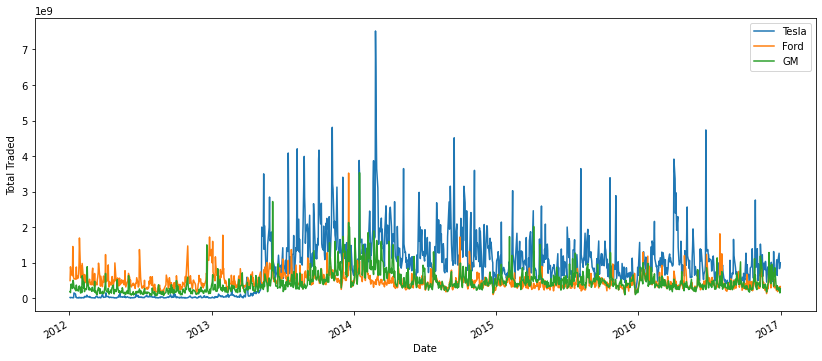

In [41]:
tesla['Total traded'].plot(label = 'Tesla', figsize = (14,6))
ford['Total traded'].plot(label = 'Ford')
GM['Total traded'].plot(label = 'GM')
plt.legend()
plt.ylabel('Total Traded')

In [43]:
tesla['Total traded'].argmax()
#POSITION OF THE MAX


538

In [44]:
tesla.iloc[[tesla['Total traded'].argmax()]]

,High,Low,Open,Close,Volume,Adj Close,Total traded
Date,,,,,,,
2014-02-25,51.84,45.689999,46.0,49.599998,163408500,49.599998,7.516791e+09


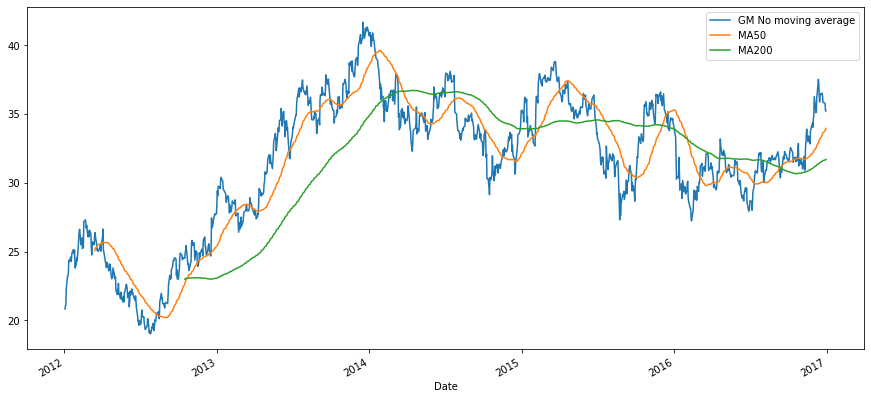

In [49]:
GM['Open'].plot(label = 'GM No moving average', figsize = (15,7))
GM['MA50'] = GM['Open'].rolling(50).mean()
GM['MA50'].plot(label = 'MA50')
GM['MA200'] = GM['Open'].rolling(200).mean()
GM['MA200'].plot(label = 'MA200')
plt.legend()